In [1]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#changing to current working directory
import os

project_folder = "drive//MyDrive//faceExpressionRecognition"
os.chdir(project_folder)

os.getcwd()

'/content/drive/MyDrive/faceExpressionRecognition'

**<u>Importing Libraries</u>**

In [3]:
from os.path import join as join

import cv2

from tqdm import tqdm

import numpy as np
import random

import matplotlib.pyplot as plt

from jupyternotebook.constants import dict_expression_num

**<u>Exploratory Data Analysis</u>**

In [7]:
dataset_folder = 'dataFiles//train'
dict_images_count = {'folder_name':[],
                     'count':[]}
no_folders = os.listdir(dataset_folder)
print(no_folders)
for folder_name in no_folders:
    folder_path = join(dataset_folder,folder_name)
    no_images = len(os.listdir(folder_path))
    dict_images_count['folder_name'].append(folder_name)
    dict_images_count['count'].append(no_images)

['angry', 'disgust', 'fear', 'sad', 'neutral', 'happy', 'surprise']
3977
435
4084
4819
4942
7192
3161


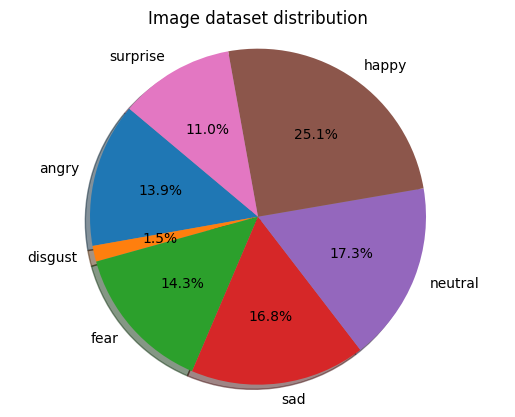

In [14]:
# Create pie chart
plt.pie(dict_images_count['count'], labels=dict_images_count['folder_name'],
        autopct='%1.1f%%', shadow=True,
        startangle=140)

plt.axis('equal')

# Add a title
plt.title('Image dataset distribution')

# Show the plot
plt.show()

Image data set is totally imbalanced.

**<u>Train and test set preparation</u>**

In [ ]:
def prepare_train_dataset(data_set_path,
                          img_size=(64,64),
                          image_type='binary'):
    """
    """
    #lists used for training
    training_img = []
    training_label = []

    #lists for validation dataset
    valid_img = []
    valid_label = []

    folders = os.listdir(data_set_path)

    # Iterating over folders
    for folder in tqdm(folders):
        label = dict_expression_num[folder]

        folder_path = join(data_set_path,folder)

        i =1
        list_images = os.listdir(folder_path)

        for image in tqdm(list_images):
            image_path =  join(folder_path,image)

            # read input image and convert into gray scale image
            if image_type == "binary":
                img = cv2.imread(image_path,0)
            if image_type == "coloured":
                img = cv2.imread(image_path)

            # Resize the image
            img = cv2.resize(img,img_size)

            # split the  validation and training dataset as 10%
            # and 90% respectively
            if i%10 == 0:
                valid_img.append(img)
                valid_label.append([label])
            else:
                training_img.append(img)
                training_label.append([label])

            i+=1

    shuffle_training = list(zip(training_img,
                               training_label))

    random.shuffle(shuffle_training)

    training_img,training_label = zip(*shuffle_training)

    return training_img,training_label,valid_img, valid_label

In [ ]:
%%time
import numpy as np

training_img,training_label,valid_img, valid_label = prepare_train_dataset(
    'dataFiles//train')

np.save(join("dataFiles", 'valid_img.npy'),
        valid_img)
np.save(join('dataFiles', 'valid_label.npy'),
    valid_label)

np.save(join('dataFiles', 'training_img.npy'),
    training_img)
np.save(join('dataFiles', 'training_label.npy'),
    training_label)




100%|██████████| 7/7 [09:57<00:00, 85.36s/it]


CPU times: user 13.5 s, sys: 6.01 s, total: 19.5 s
Wall time: 9min 58s
